# Important Note: 

This notebook is meant to be used with csvs generated by my other project, [assetto-corsa-lap-logger-plus](https://github.com/RakeJyals/assetto-corsa-lap-logger-plus)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
# TODO: Expedite reading/joining of several csv files
df = pd.read_csv("interlagos_full_stint.csv", header = 0)

In [10]:
df["worst_tire_wear"] = df[[f"tire_wear{i}" for i in range(1, 5)]].min(axis = 1, )
df["delta_tire_wear"] = df["worst_tire_wear"].diff()
df["fuel_consumption"] = df["fuel"].diff()

In [11]:
df.head()

,time,fuel,tire_wear1,tire_wear2,tire_wear3,tire_wear4,worst_tire_wear,delta_tire_wear,fuel_consumption
1,NaN,97.60,99.96,99.95,99.98,99.98,99.95,NaN,NaN
2,244297.0,95.18,99.92,99.90,99.96,99.96,99.90,-0.05,-2.42
3,93920.0,92.75,99.87,99.84,99.94,99.93,99.84,-0.06,-2.43
4,93477.0,90.31,99.82,99.79,99.92,99.91,99.79,-0.05,-2.44
5,93586.0,87.83,99.78,99.73,99.89,99.89,99.73,-0.06,-2.48


In [5]:
def distplots(df):
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

    axes[0].plot(df["time"])
    axes[0].set_title("Distribution of lap times")
    #axes[0].set_xticks(rotation = 45)  # Need to generate new ticks to use

    axes[1].hist(df["delta_tire_wear"])
    axes[1].set_title("Distribution of tire wear")

    axes[2].hist(df["fuel_consumption"])
    axes[2].set_title("Distribution of fuel consumption")

plt.show()

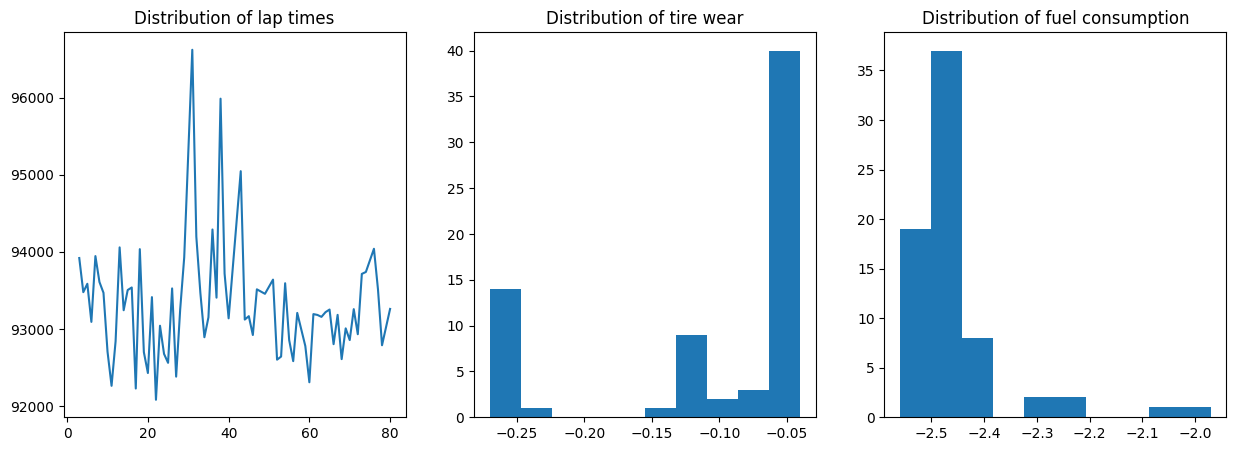

In [13]:
distplots(df[(df["time"] > 75000) & (df["time"] < 100000)])
#distplots(df)

In [14]:
df[df.fuel_consumption > 0]

,time,fuel,tire_wear1,tire_wear2,tire_wear3,tire_wear4,worst_tire_wear,delta_tire_wear,fuel_consumption
41,101272.0,97.52,99.96,99.95,99.98,99.98,99.95,4.19,95.65


In [15]:
df[(df["time"] > 75000) & (df["time"] < 100000)].time.mean()

np.float64(93307.4)